In [ ]:
# install tensorflow
import tensorflow as tf

# notebook for classifying the CIFAR10 dataset using convolutional neural network

this preforms image classification on a more difficult dataset than fashion mnist (last notebook), and builds the CNN using Keras Functional API

In [ ]:
# other imports
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D
from tensorflow.keras.models import Model

In [ ]:
# load the data, included in tf
cifar10 = tf.keras.datasets.cifar10

# load data reutrns two tuples
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# scale x data, flatten y data (targets are 2D (N x 1), so flatten to 1D)
x_train, x_test = x_train/255., x_test/255.
y_train, y_test = y_train.flatten(), y_test.flatten()
print('x_train.shape = ', x_train.shape)
print('y_train.shape = ', y_train.shape)

170498071/170498071 [==============================] - 2s 0us/step
x_train.shape =  (50000, 32, 32, 3)
y_train.shape =  (50000,)


In [ ]:
# deduce number of classes (K), or the number of unique values in y_train 
K = len(set(y_train))
print('number of classes:', K)

number of classes: 10


In [ ]:
# now to build the model using keras functional API 
# follow the pattern of increasing the number of feature maps in the conv layers
i = Input(shape=x_train[0].shape)
x = Conv2D(32 , (3,3), strides=2, activation='relu')(i) 
x = Conv2D(64 , (3,3), strides=2, activation='relu')(x) 
x = Conv2D(128, (3,3), strides=2, activation='relu')(x) 
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [ ]:
# compile and fit the model
# this takes some time, so make sure to use the GPU for this
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 22s 5ms/step - loss: 1.5764 - accuracy: 0.4238 - val_loss: 1.3124 - val_accuracy: 0.5221
Epoch 2/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2947 - accuracy: 0.5307 - val_loss: 1.1780 - val_accuracy: 0.5745
Epoch 3/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1629 - accuracy: 0.5848 - val_loss: 1.0419 - val_accuracy: 0.6256
Epoch 4/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0772 - accuracy: 0.6140 - val_loss: 1.0361 - val_accuracy: 0.6280
Epoch 5/15
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0007 - accuracy: 0.6444 - val_loss: 0.9510 - val_accuracy: 0.6663
Epoch 6/15
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9382 - accuracy: 0.6671 - val_loss: 0.9260 - val_accuracy: 0.6690
Epoch 7/15
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8867 - accuracy: 0.6864 - val_loss: 0.8793 - val_accuracy

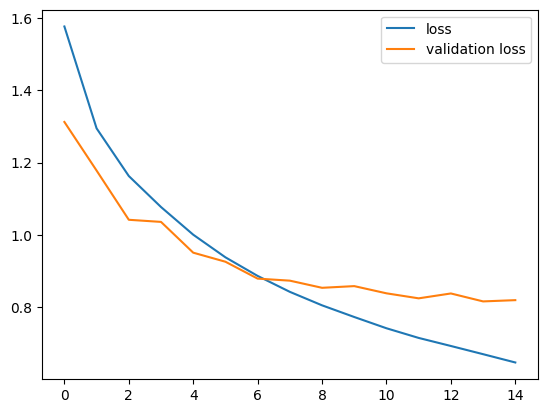

In [ ]:
# plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# there's a chance we are overfitting - validation loss is high
# so just training longer doesn't work great

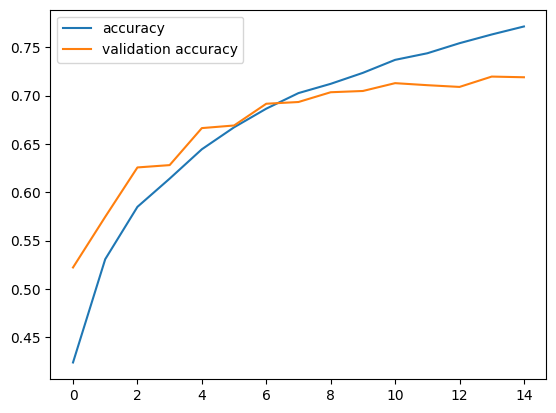

In [9]:
# plot accuracy per iteration
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

313/313 [==============================] - 2s 5ms/step
confusion matrix without normalization
[[766  24  35   9  18   7  14  14  73  40]
 [ 14 836   2   5   5   6  14   3  25  90]
 [ 75   7 522  53 132  68  95  27  15   6]
 [ 19   9  55 423  85 206 124  45  16  18]
 [ 32   5  37  30 744  30  53  58   9   2]
 [ 14   4  35 124  76 621  53  49  13  11]
 [  5   6  19  34  48  22 846   8   5   7]
 [ 16   2  22  29  51  63  15 785   3  14]
 [ 61  37   9   9  10   4   4   7 829  30]
 [ 34  67  12  11   8   5   9  16  21 817]]


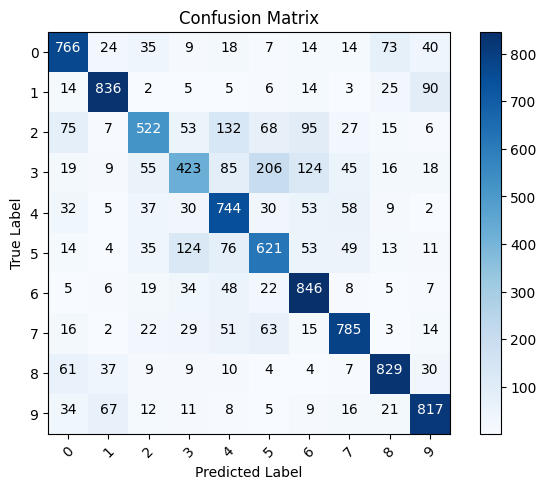

In [10]:
# plot the confusion matrix 
# this tells us: for each label, how many predictions corresponded to that label
# we want most of the entries to be on the diagonal (i.e. entries = prediction)

# the following function requires sklearn and itertools
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, 
                          normalize=False,
                          title='Confusion Matrix', 
                          cmap=plt.cm.Blues): 
  """
  This function prints and plots the confusion matrix, 
  normalization can be applied by setting normalize=True.
  """
  if normalize: 
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("normalized confusion matrix")
  else: 
    print("confusion matrix without normalization")

  print(cm)
    
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])): 
    plt.text(j, i, format(cm[i,j], fmt), 
             horizontalalignment='center',
             color='white' if cm[i,j] > thresh else 'black') 

  plt.tight_layout()
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))  

In [12]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer 
dog
frog
horse
ship
truck'''.split()

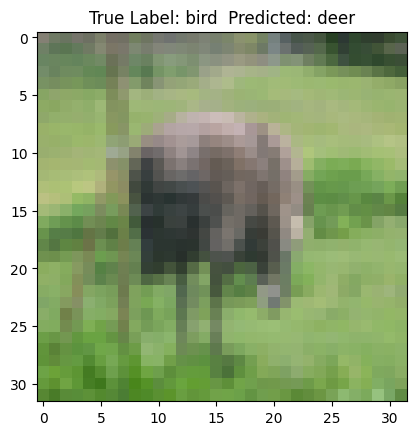

In [15]:
# plot misclassified examples
# index of misclassified predictions using np.where
# np.where returns two values, but index is first (hence [0])
misclassified_idx = np.where(p_test != y_test)[0]

# select a random index and plot
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title('True Label: %s  Predicted: %s' % (labels[y_test[i]], labels[p_test[i]]))
plt.show()